In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data = pd.read_csv('housing.csv')
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(axis = 0, how = "any", inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
data = pd.concat(
    [data, pd.get_dummies(data.ocean_proximity)], axis = 1
).drop(['ocean_proximity'], axis = 1)

In [ ]:
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['households'] = np.log(data['households'] + 1)
data['population'] = np.log(data['population'] + 1)
##ratio
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,2.051692,1.769435,1.913631,1.765448,8.3252,452600.0,False,False,False,True,False,0.862427,1.162137
1,-122.22,37.86,21.0,2.289282,2.080617,2.172938,2.084169,8.3014,358500.0,False,False,False,True,False,0.908851,1.098415
2,-122.24,37.85,52.0,2.115250,1.832945,1.975273,1.821607,7.2574,352100.0,False,False,False,True,False,0.866538,1.161200
3,-122.25,37.85,52.0,2.098104,1.866222,1.991450,1.855302,5.6431,341300.0,False,False,False,True,False,0.889480,1.130869
4,-122.25,37.85,52.0,2.127649,1.892864,1.993147,1.881095,3.8462,342200.0,False,False,False,True,False,0.889651,1.131070


In [ ]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
20635,-121.09,39.48,25.0,2.130394,1.935416,2.046469,1.917234,1.5603,78100.0,False,True,False,False,False,0.908478,1.111181
20636,-121.21,39.49,18.0,2.021312,1.794635,1.928289,1.748318,2.5568,77100.0,False,True,False,False,False,0.887857,1.156146
20637,-121.22,39.43,17.0,2.165723,1.972164,2.068851,1.956291,1.7000,92300.0,False,True,False,False,False,0.910626,1.107056
20638,-121.32,39.43,18.0,2.143457,1.948216,2.029378,1.925406,1.8672,84700.0,False,True,False,False,False,0.908913,1.113249
20639,-121.24,39.37,16.0,2.189681,2.004835,2.108469,1.984411,2.3886,89400.0,False,True,False,False,False,0.915583,1.103441


In [ ]:
from sklearn.model_selection import train_test_split

a = data.drop(['median_house_value'], axis = 1)
b = data['median_house_value']

a_train, a_test,b_train, b_test = train_test_split(a, b, test_size = 0.3)

In [ ]:
train_data = a_train.join(b_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,median_house_value
15966,-122.45,37.71,34.0,2.202701,2.015873,2.163149,2.001290,3.5536,False,False,False,False,True,0.915182,1.100641,251000.0
6727,-118.12,34.12,52.0,2.194468,1.911326,2.062270,1.892327,15.0001,True,False,False,False,False,0.870975,1.159666,500001.0
15987,-122.47,37.76,40.0,2.215710,2.060259,2.131104,2.048287,3.2083,False,False,False,True,False,0.929841,1.081738,330000.0
17667,-121.88,37.32,38.0,2.138754,1.978578,2.158292,1.984411,2.6386,True,False,False,False,False,0.925108,1.077778,177600.0
9486,-123.18,39.26,25.0,2.200381,1.994345,2.122477,1.985699,3.7880,True,False,False,False,False,0.906363,1.108114,134200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16554,-121.30,37.85,35.0,2.072185,1.845730,2.002186,1.834610,2.2391,False,True,False,False,False,0.890717,1.129496,120000.0
5103,-118.30,33.95,50.0,2.142380,1.915445,2.053429,1.909924,3.1346,True,False,False,False,False,0.894073,1.121710,120000.0
6143,-117.98,34.10,22.0,2.266080,2.091664,2.260961,2.088454,3.7727,False,True,False,False,False,0.923032,1.085052,159700.0
7652,-118.27,33.83,28.0,2.160401,1.950284,2.127356,1.954981,4.3500,True,False,False,False,False,0.902742,1.105075,200500.0


In [ ]:
train_data['population'].value_counts().plot.pie(figsize=(10, 10), autopct='%1.1f%%')
plt.ylabel('proportions')
plt.title('population count')
plt.show()
plt.show()

NameError: name 'train_data' is not defined

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'bedroom_ratio'}>],
       [<Axes: title={'center': 'household_rooms'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >]],
      dtype=object)

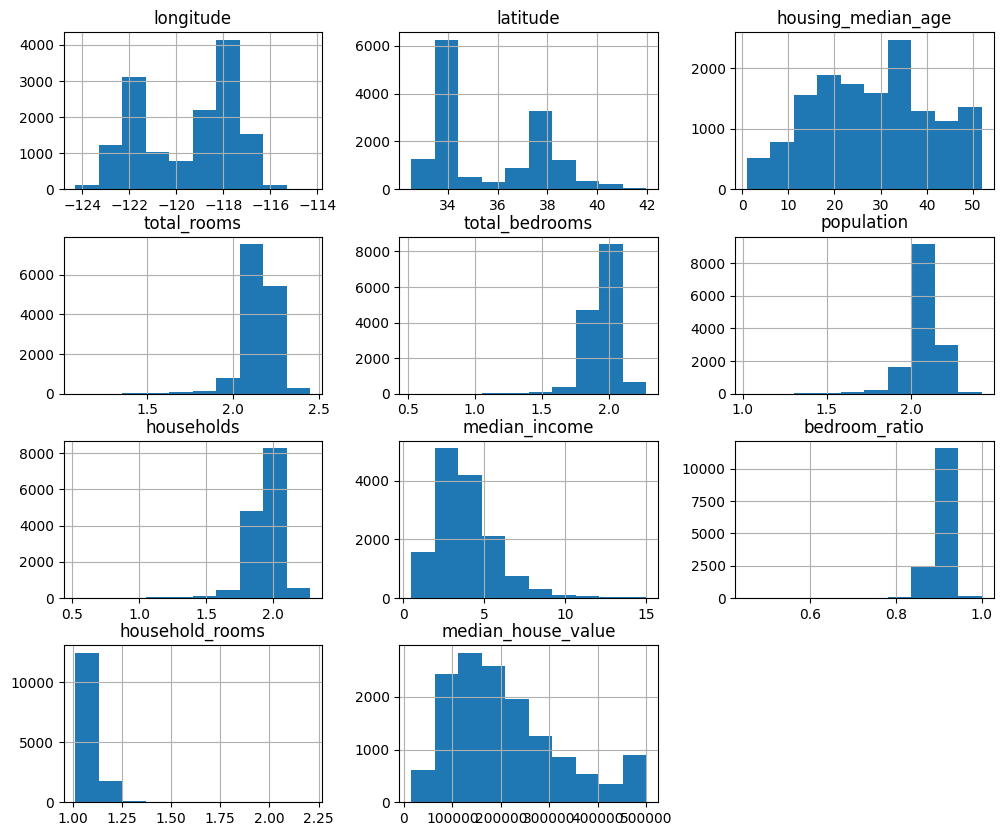

In [ ]:
train_data.hist(figsize = (12, 10), bins = 10)

<Axes: >

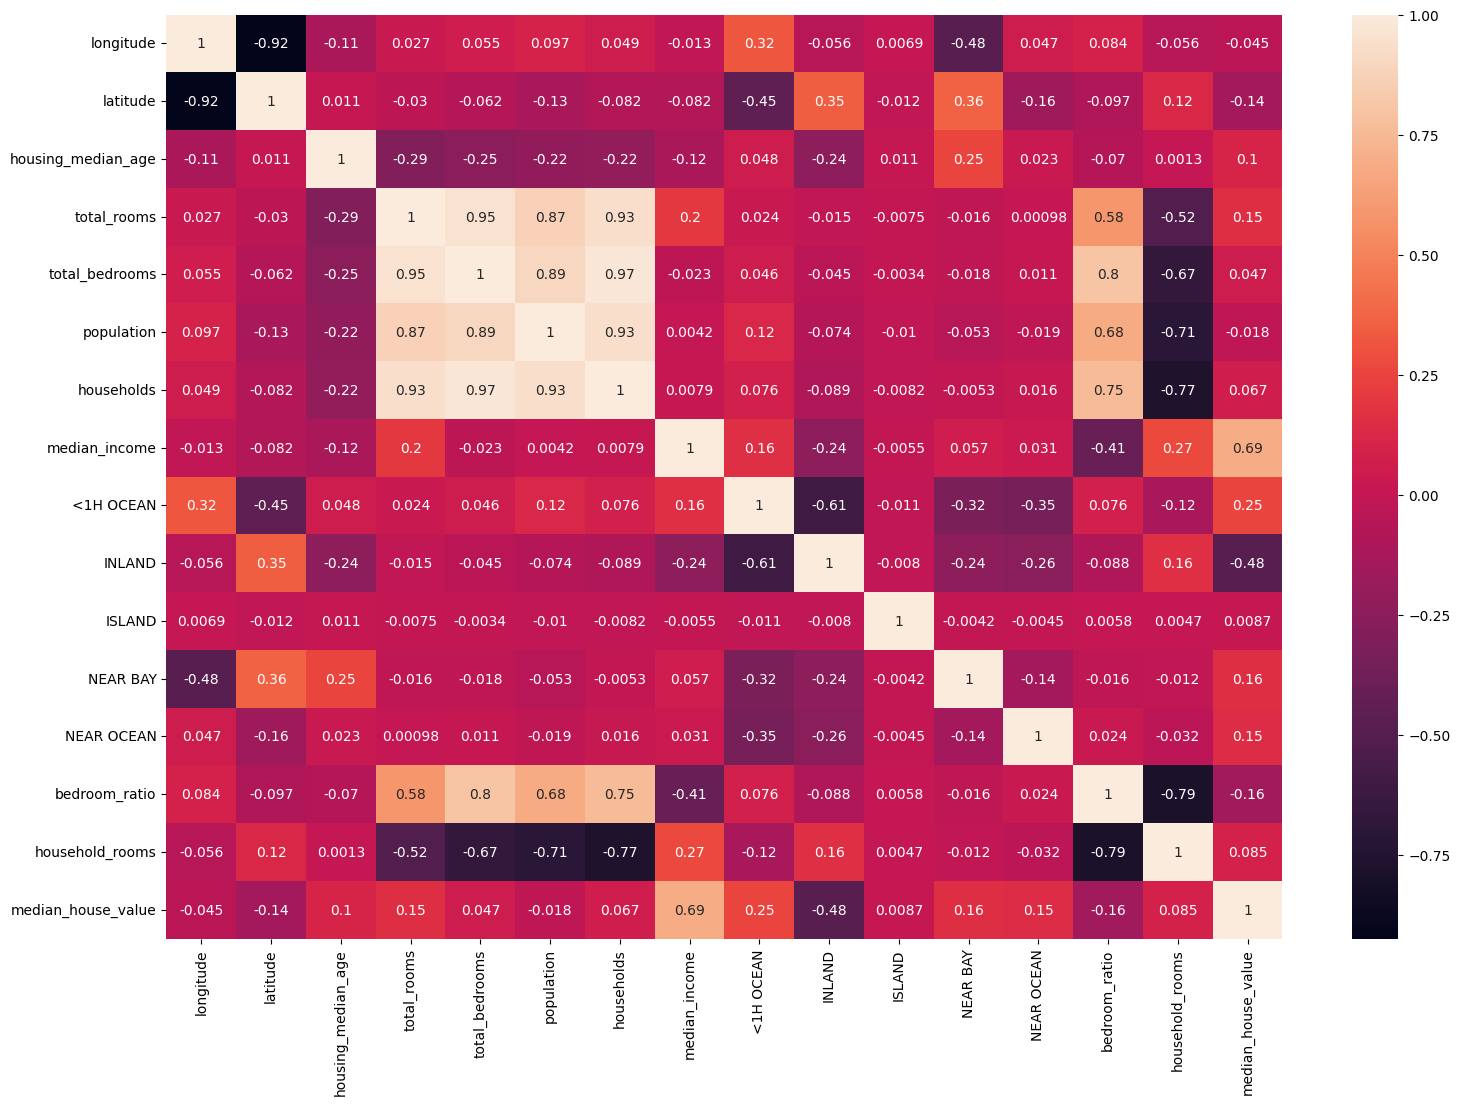

In [ ]:
plt.figure(figsize = (18, 12))
sns.heatmap(train_data.corr(), annot = True, annot_kws = {'size' : 10})

<Axes: xlabel='longitude', ylabel='latitude'>

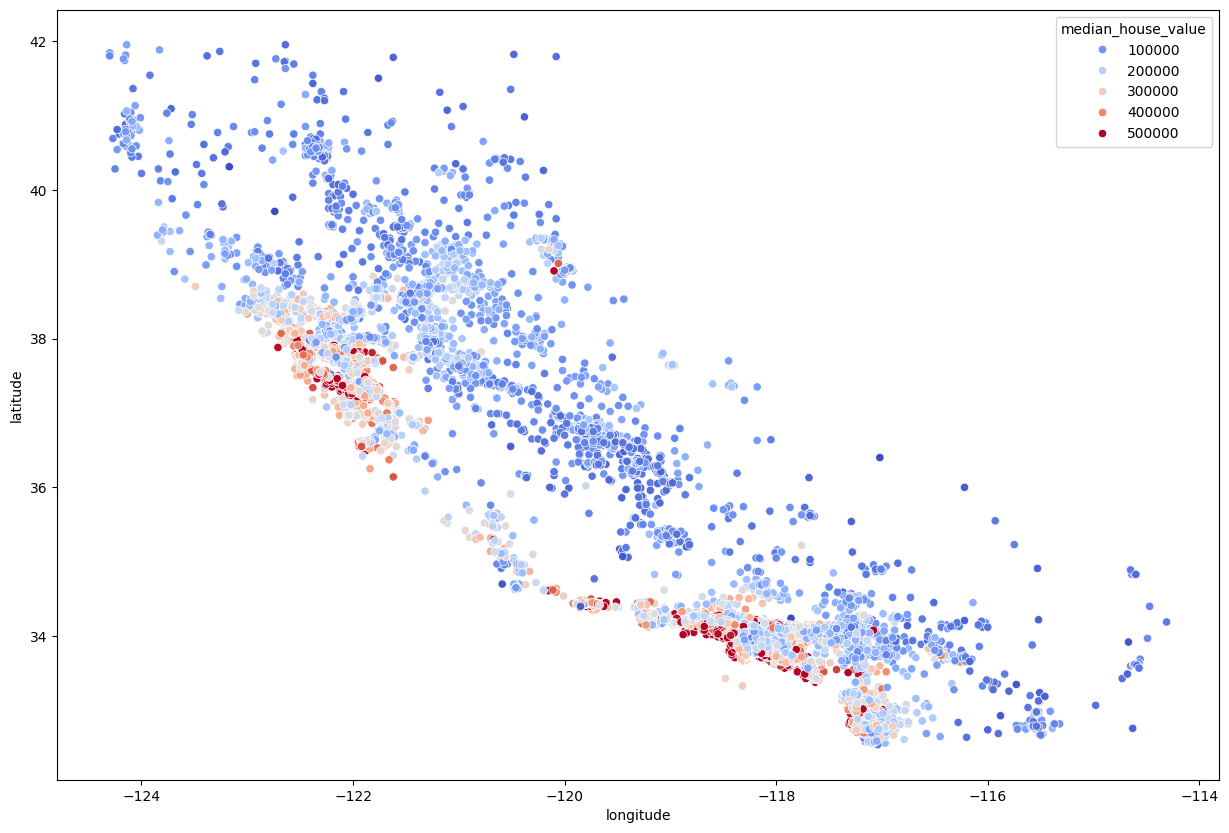

In [ ]:
plt.figure(figsize = (15, 10))
sns.scatterplot(data = train_data, x = 'longitude', y = 'latitude', hue = 'median_house_value', palette = 'coolwarm')

<Axes: >

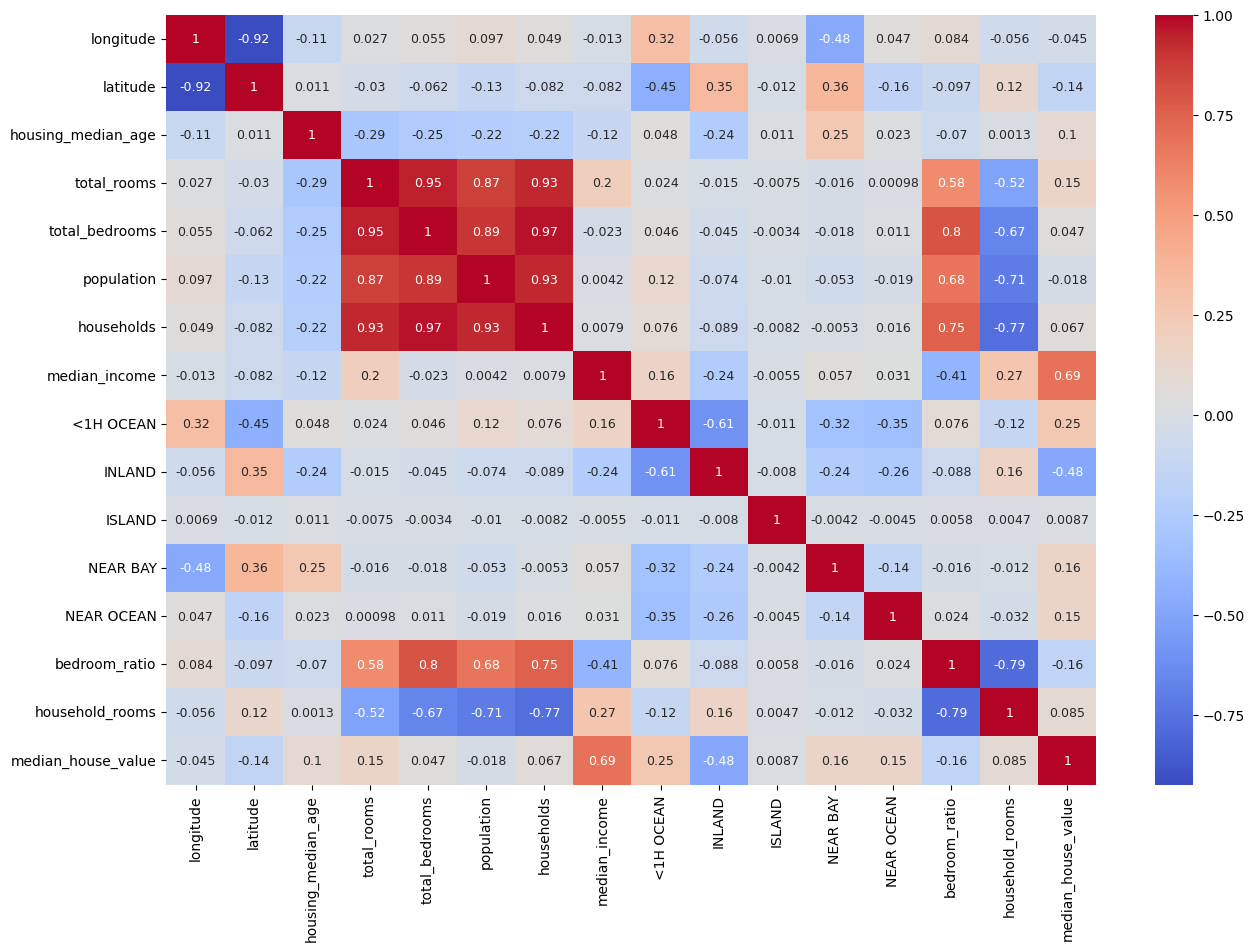

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(train_data.corr(), annot = True, annot_kws = {'size' : 9}, cmap = 'coolwarm')

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(a_train, b_train)
y_pred = lin_reg.predict(a_test)

In [ ]:
lin_reg.score(a_test, b_test)

0.6638427315802855

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(a_train, b_train)
y_pred = rf_reg.predict(a_test)

In [ ]:
rf_reg.score(a_test, b_test)

0.8131012337892575

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [10, 20, 30],
    'max_features' : [2, 4, 6, 8],
    'min_samples_split' : [2, 4, 6, 8]
}

grid_search = GridSearchCV(rf_reg, param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(a_train, b_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(a_train, b_train)
b_pred = best_model.predict(a_test)
best_model.score(a_test, b_test)
a_pred = best_model.predict(a_train)
best_model.score(a_test, b_test)

0.8093526891053819